In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
farm = pd.read_csv('Smart_Farming_Crop_Yield_2024.csv')
farm.head()

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,NaN,...,2024-01-08,2024-05-09,122,4408.07,SENS0001,2024-03-19,14.970941,82.997689,0.63,Mild
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,2024-02-04,2024-05-26,112,5389.98,SENS0002,2024-04-21,16.613022,70.869009,0.58,NaN
2,FARM0003,South USA,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,...,2024-02-03,2024-06-26,144,2931.16,SENS0003,2024-02-28,19.503156,79.068206,0.80,Mild
3,FARM0004,Central USA,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,...,2024-02-21,2024-07-04,134,4227.80,SENS0004,2024-05-14,31.071298,85.519998,0.44,NaN
4,FARM0005,Central USA,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,NaN,...,2024-02-05,2024-05-20,105,4979.96,SENS0005,2024-04-13,16.568540,81.691720,0.84,Severe


In [3]:
farm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    object 
 1   region                500 non-null    object 
 2   crop_type             500 non-null    object 
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       350 non-null    object 
 10  fertilizer_type       500 non-null    object 
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    object 
 13  harvest_date          500 non-null    object 
 14  total_days            500 non-null    int64  
 15  yield_kg_per_hectare  5

In [4]:
farm.describe()

,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,pesticide_usage_ml,total_days,yield_kg_per_hectare,latitude,longitude,NDVI_index
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,26.750140,6.523980,24.675740,181.685740,65.194460,7.03014,26.586980,119.496000,4032.92694,22.442473,80.392248,0.602060
std,10.150053,0.585558,5.348899,72.293091,14.642849,1.69167,13.202429,16.798046,1174.43304,7.283492,5.910664,0.175402
min,10.160000,5.510000,15.000000,50.170000,40.230000,4.01000,5.050000,90.000000,2023.56000,10.004243,70.020021,0.300000
25%,17.890000,6.030000,20.295000,119.217500,51.865000,5.66750,14.945000,105.750000,2994.82000,16.263202,75.374713,0.447500
50%,25.855000,6.530000,24.655000,191.545000,65.685000,6.99500,25.980000,119.000000,4071.69000,21.981743,80.650284,0.610000
75%,36.022500,7.040000,29.090000,239.035000,77.995000,8.47000,38.005000,134.000000,5062.11000,28.528948,85.654629,0.750000
max,44.980000,7.500000,34.840000,298.960000,90.000000,10.00000,49.940000,150.000000,5998.29000,34.981531,89.991901,0.900000


In [5]:
farm.shape

(500, 22)

In [6]:
farm.isnull().sum()

farm_id                   0
region                    0
crop_type                 0
soil_moisture_%           0
soil_pH                   0
temperature_C             0
rainfall_mm               0
humidity_%                0
sunlight_hours            0
irrigation_type         150
fertilizer_type           0
pesticide_usage_ml        0
sowing_date               0
harvest_date              0
total_days                0
yield_kg_per_hectare      0
sensor_id                 0
timestamp                 0
latitude                  0
longitude                 0
NDVI_index                0
crop_disease_status     130
dtype: int64

In [7]:
mode_irrigation_type = farm['irrigation_type'].mode()[0]
farm['irrigation_type'].fillna(value=mode_irrigation_type, inplace=True)
farm.isnull().sum()

farm_id                   0
region                    0
crop_type                 0
soil_moisture_%           0
soil_pH                   0
temperature_C             0
rainfall_mm               0
humidity_%                0
sunlight_hours            0
irrigation_type           0
fertilizer_type           0
pesticide_usage_ml        0
sowing_date               0
harvest_date              0
total_days                0
yield_kg_per_hectare      0
sensor_id                 0
timestamp                 0
latitude                  0
longitude                 0
NDVI_index                0
crop_disease_status     130
dtype: int64

In [8]:
farm_n = farm.select_dtypes(include = np.number)
farm_c = farm.select_dtypes(include = 'object')

farm_n.shape

(500, 12)

In [9]:
farm_c.shape

(500, 10)

In [10]:
farm_n.columns

Index(['soil_moisture_%', 'soil_pH', 'temperature_C', 'rainfall_mm',
       'humidity_%', 'sunlight_hours', 'pesticide_usage_ml', 'total_days',
       'yield_kg_per_hectare', 'latitude', 'longitude', 'NDVI_index'],
      dtype='object')

In [11]:
farm_c.columns

Index(['farm_id', 'region', 'crop_type', 'irrigation_type', 'fertilizer_type',
       'sowing_date', 'harvest_date', 'sensor_id', 'timestamp',
       'crop_disease_status'],
      dtype='object')

In [12]:
farm = farm.drop(columns=['farm_id','irrigation_type', 'sensor_id'], axis=1)

In [13]:
farm_n = farm.select_dtypes(include = np.number)
farm_c = farm.select_dtypes(include = 'object')

In [14]:
farm_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   soil_moisture_%       500 non-null    float64
 1   soil_pH               500 non-null    float64
 2   temperature_C         500 non-null    float64
 3   rainfall_mm           500 non-null    float64
 4   humidity_%            500 non-null    float64
 5   sunlight_hours        500 non-null    float64
 6   pesticide_usage_ml    500 non-null    float64
 7   total_days            500 non-null    int64  
 8   yield_kg_per_hectare  500 non-null    float64
 9   latitude              500 non-null    float64
 10  longitude             500 non-null    float64
 11  NDVI_index            500 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 47.0 KB


In [124]:
farm_c.columns

Index(['region', 'crop_type', 'fertilizer_type', 'sowing_date', 'harvest_date',
       'timestamp', 'crop_disease_status'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x19b073d5a60>,
 [Text(-1.0999997320361394, 0.0007678023321658548, ''),
  Text(-0.2136579165524523, -1.0790506451017325, ''),
  Text(1.0064558252987479, -0.44389939369435555, ''),
  Text(0.7383232722519888, 0.8154009723143063, ''),
  Text(-0.3848691779220306, 1.0304735396339009, '')],
 [Text(-0.5999998538378942, 0.0004188012720904662, '22.2%'),
  Text(-0.11654068175588306, -0.5885730791463996, '21.6%'),
  Text(0.5489759047084078, -0.24212694201510299, '21.4%'),
  Text(0.4027217848647211, 0.4447641667168943, '18.4%'),
  Text(-0.20992864250292578, 0.5620764761639458, '16.4%')])

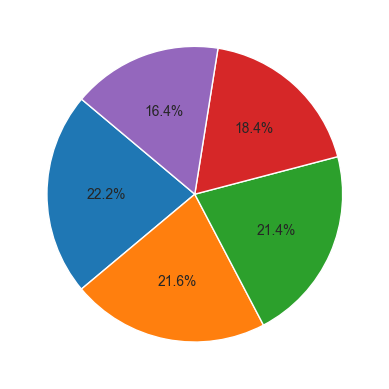

In [130]:
crop_type = farm['crop_type'].value_counts()
plt.pie(crop_type, autopct='%1.1f%%', startangle=140)

([<matplotlib.patches.Wedge at 0x19b07567fb0>,
 [Text(-1.0999032330678142, 0.01459033539606525, ''),
  Text(-0.24744630282857863, -1.0718070382379785, ''),
  Text(0.9635671593957775, -0.5306018557581121, ''),
  Text(0.8346985915256653, 0.7164344082364211, ''),
  Text(-0.3260117026736486, 1.0505790640022428, '')],
 [Text(-0.5999472180369895, 0.007958364761490136, '21.8%'),
  Text(-0.13497071063377014, -0.5846220208570791, '21.4%'),
  Text(0.5255820869431513, -0.2894191940498793, '19.8%'),
  Text(0.455290140832181, 0.39078240449259327, '18.8%'),
  Text(-0.17782456509471742, 0.5730431258194051, '18.2%')])

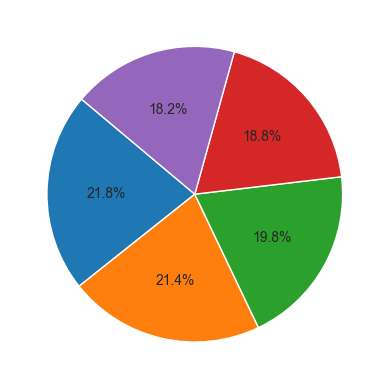

In [133]:
region_count = farm_c['region'].value_counts()
plt.pie(region_count, autopct='%1.1f%%', startangle=140)

<Axes: xlabel='crop_type', ylabel='count'>

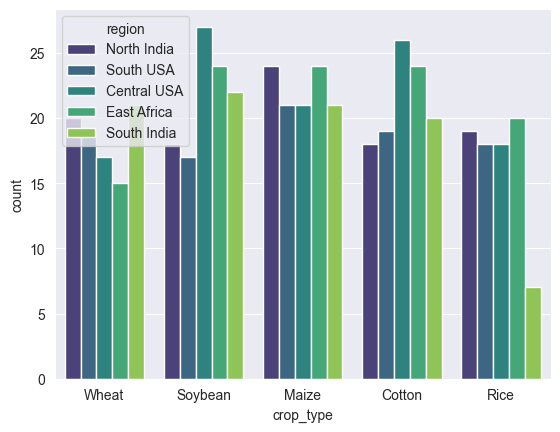

In [19]:
sns.countplot(x='crop_type', hue='region', data=farm_c, palette='viridis')

<Axes: xlabel='fertilizer_type', ylabel='count'>

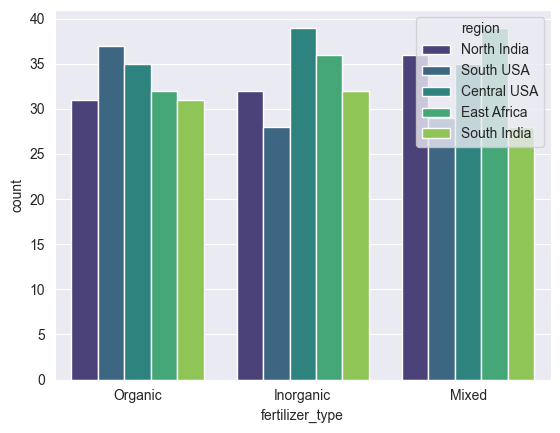

In [21]:
sns.countplot(x='fertilizer_type', hue='region', data=farm_c, palette='viridis')

<Axes: xlabel='crop_disease_status', ylabel='count'>

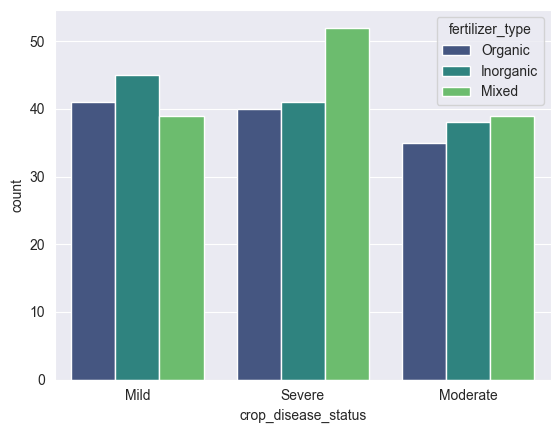

In [23]:
sns.countplot(x='crop_disease_status', hue='fertilizer_type', data=farm_c, palette='viridis')

<Axes: xlabel='harvest_date', ylabel='crop_type'>

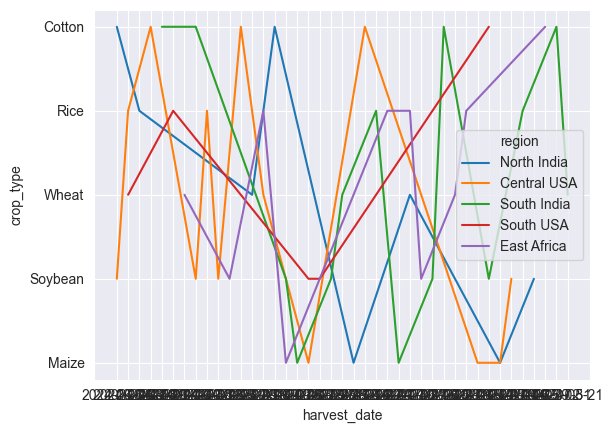

In [63]:
farm_c2 = farm_c.sample(n=50)
sns.lineplot(x='harvest_date', y='crop_type', hue='region', data=farm_c2)

<Axes: xlabel='sowing_date', ylabel='crop_type'>

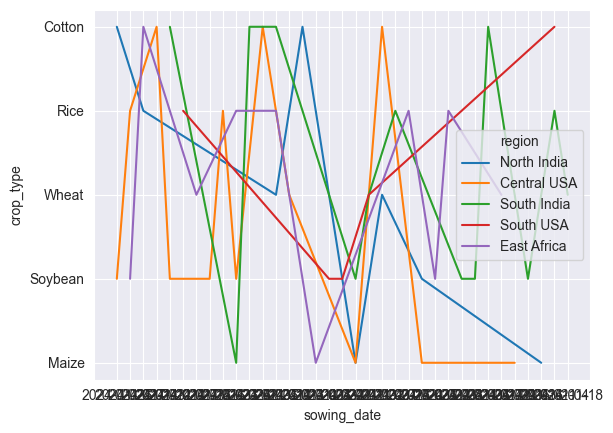

In [64]:
sns.lineplot(x='sowing_date', y='crop_type', hue='region', data=farm_c2)

In [29]:
farm_c.columns

Index(['region', 'crop_type', 'fertilizer_type', 'sowing_date', 'harvest_date',
       'timestamp', 'crop_disease_status'],
      dtype='object')

In [30]:
farm_n.columns

Index(['soil_moisture_%', 'soil_pH', 'temperature_C', 'rainfall_mm',
       'humidity_%', 'sunlight_hours', 'pesticide_usage_ml', 'total_days',
       'yield_kg_per_hectare', 'latitude', 'longitude', 'NDVI_index'],
      dtype='object')

<Axes: xlabel='latitude', ylabel='longitude'>

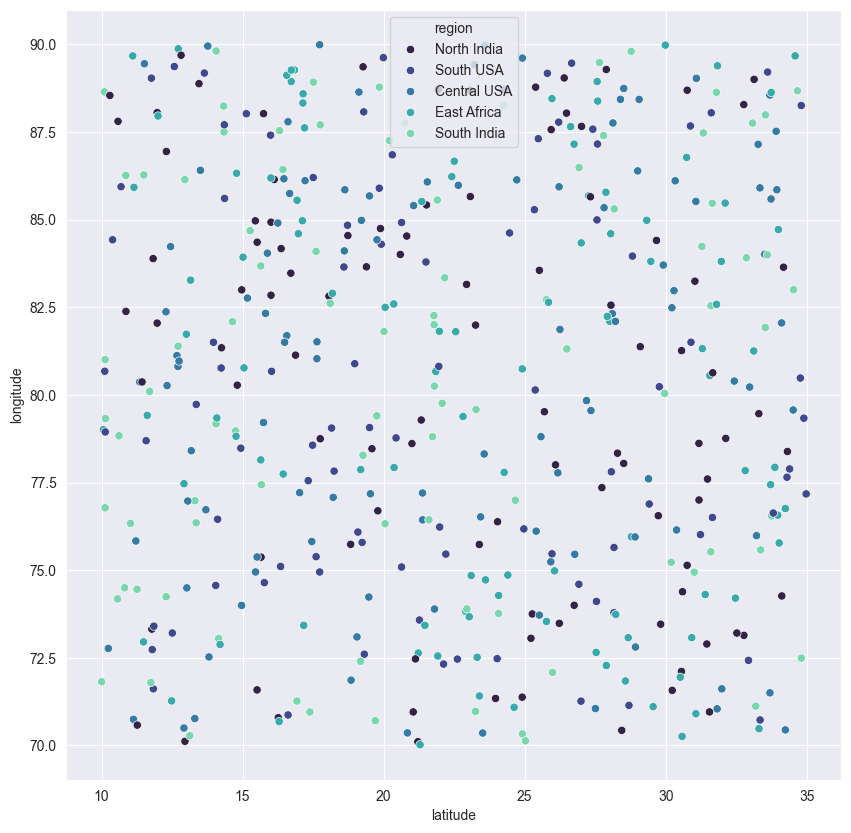

In [55]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='latitude', y='longitude', data=farm, hue='region', palette='mako')

<Axes: xlabel='soil_moisture_%', ylabel='crop_type'>

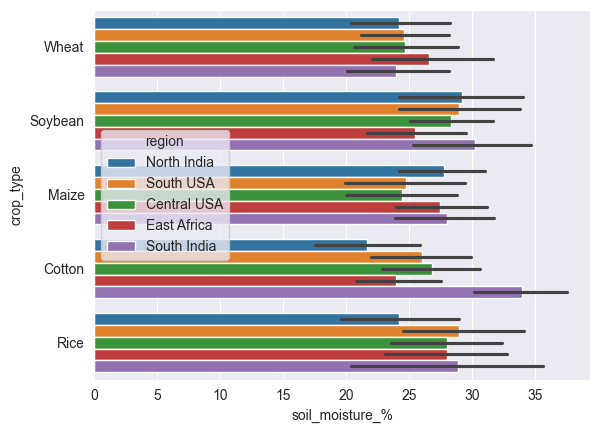

In [32]:
sns.barplot(x='soil_moisture_%', y='crop_type', hue='region', data=farm)

<Axes: xlabel='soil_pH', ylabel='crop_type'>

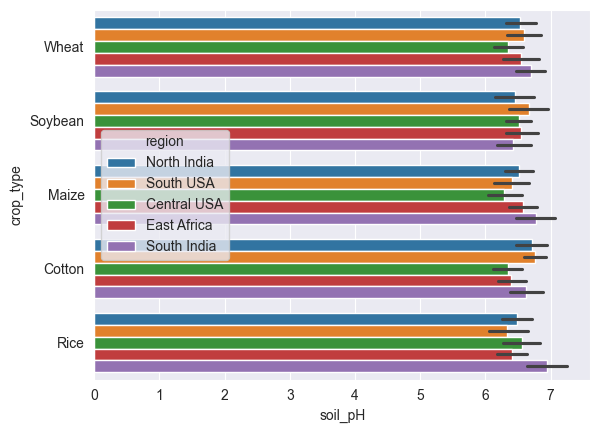

In [34]:
sns.barplot(x='soil_pH', y='crop_type', hue='region', data=farm)

<Axes: xlabel='temperature_C', ylabel='crop_type'>

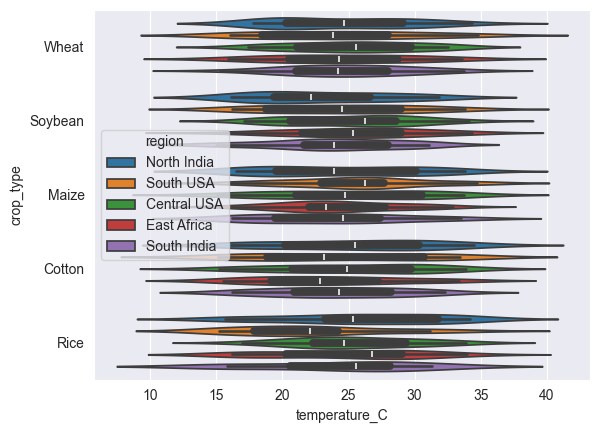

In [56]:
sns.violinplot(x='temperature_C', y='crop_type', hue='region', data=farm)

<Axes: xlabel='rainfall_mm', ylabel='crop_type'>

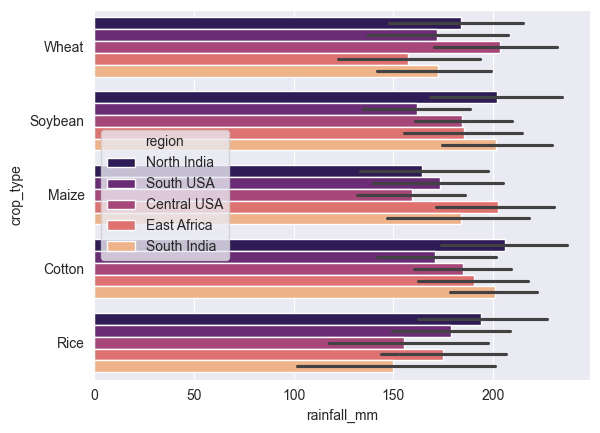

In [40]:
sns.barplot(x='rainfall_mm', y='crop_type', hue='region', data=farm, palette='magma')

<Axes: xlabel='crop_type', ylabel='rainfall_mm'>

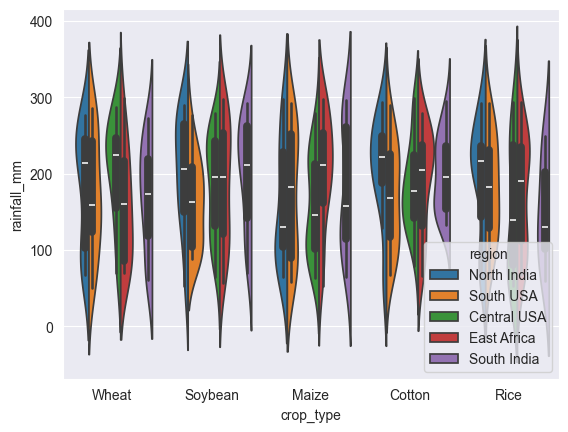

In [37]:
sns.violinplot(x='crop_type', y='rainfall_mm', hue='region', data=farm, split=True)

<Axes: xlabel='rainfall_mm', ylabel='Count'>

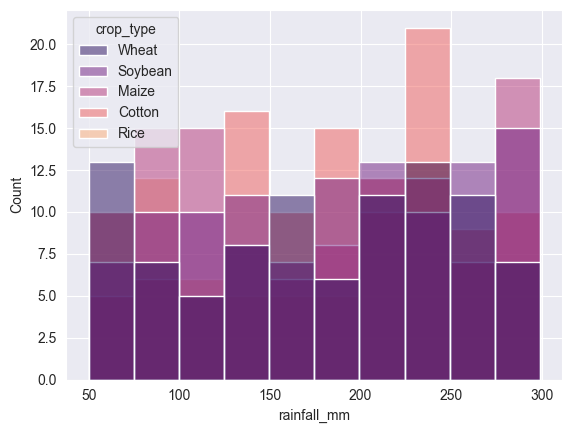

In [41]:
sns.histplot(x='rainfall_mm', hue='crop_type', data=farm, palette='magma')

<Axes: xlabel='humidity_%', ylabel='Count'>

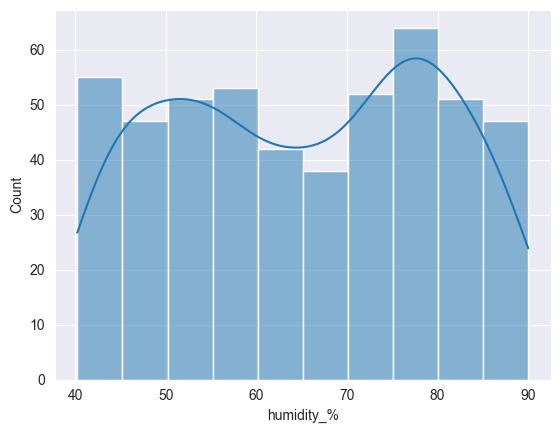

In [42]:
sns.histplot(x='humidity_%',kde=True,data=farm, palette='magma')

<Axes: xlabel='pesticide_usage_ml', ylabel='Count'>

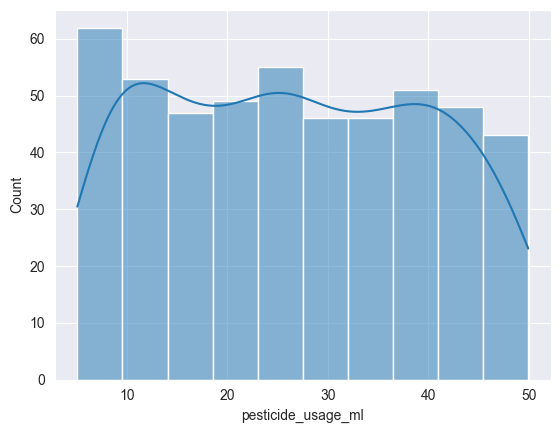

In [44]:
sns.histplot(x='pesticide_usage_ml',kde=True,data=farm, palette='magma')

<Axes: xlabel='soil_pH', ylabel='rainfall_mm'>

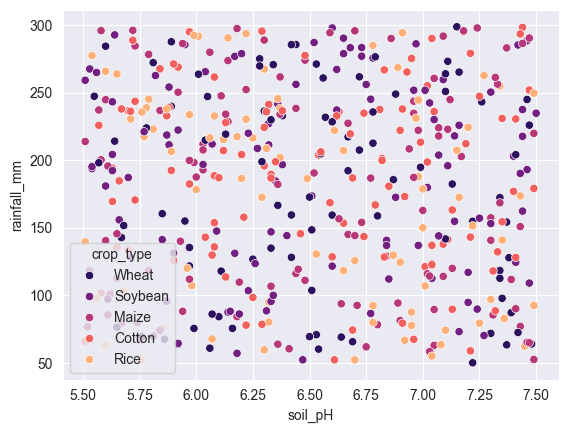

In [45]:
sns.scatterplot(x='soil_pH', y='rainfall_mm', hue='crop_type', data=farm, palette='magma')

<Axes: xlabel='soil_pH'>

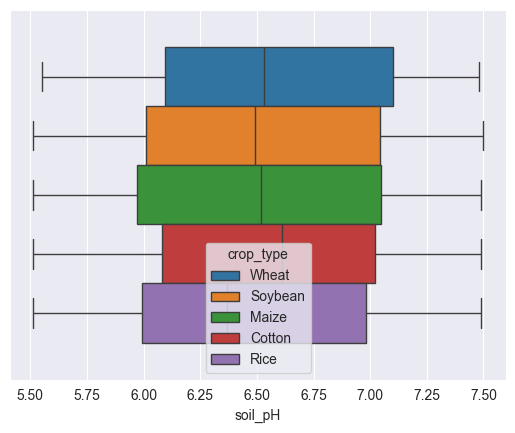

In [53]:
sns.boxplot(x='soil_pH', hue='crop_type', data=farm)

<Axes: xlabel='pesticide_usage_ml'>

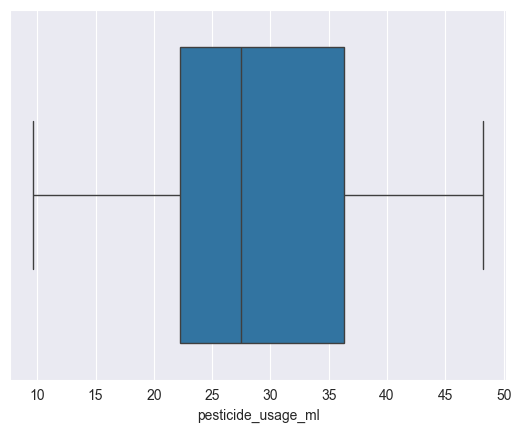

In [65]:
farm_samp = farm.sample(n=20)
sns.boxplot(x='pesticide_usage_ml', data=farm_samp)

<Axes: xlabel='soil_pH', ylabel='Density'>

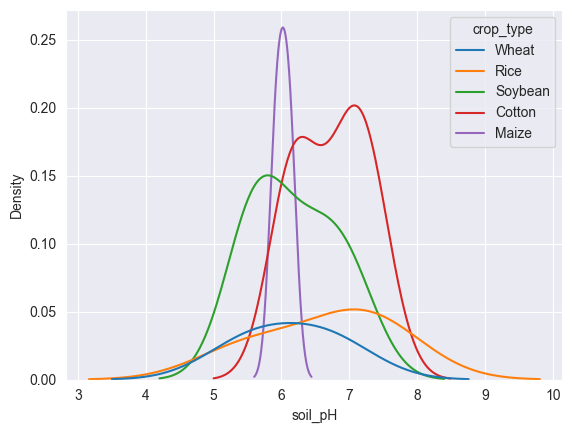

In [61]:
sns.kdeplot(x='soil_pH', hue='crop_type', data=farm_samp)

<Axes: xlabel='humidity_%', ylabel='Density'>

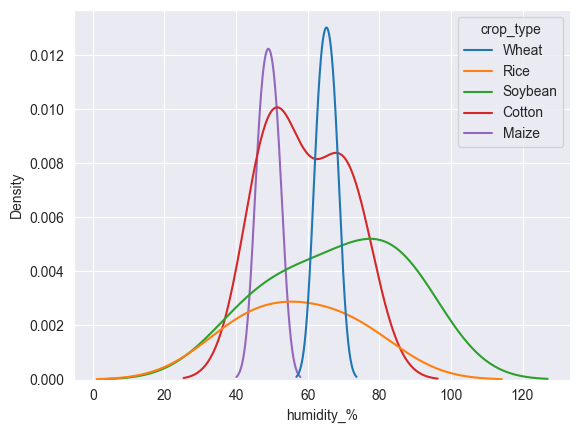

In [62]:
sns.kdeplot(x='humidity_%', hue='crop_type', data=farm_samp)

In [66]:
farm.columns

Index(['region', 'crop_type', 'soil_moisture_%', 'soil_pH', 'temperature_C',
       'rainfall_mm', 'humidity_%', 'sunlight_hours', 'fertilizer_type',
       'pesticide_usage_ml', 'sowing_date', 'harvest_date', 'total_days',
       'yield_kg_per_hectare', 'timestamp', 'latitude', 'longitude',
       'NDVI_index', 'crop_disease_status'],
      dtype='object')

In [69]:
# soil ph vs rain

sr = farm.groupby('soil_pH')['rainfall_mm'].value_counts()
sr

soil_pH  rainfall_mm
5.51     65.99          1
         139.47         1
         139.98         1
         214.04         1
         259.37         1
                       ..
7.49     92.64          1
         179.25         1
         220.04         1
         249.79         1
7.50     234.96         1
Name: count, Length: 500, dtype: int64

In [74]:
# rainfall vs humidity

rf = farm.groupby('rainfall_mm')['humidity_%'].value_counts()
rf


rainfall_mm  humidity_%
50.17        87.90         1
52.35        79.58         1
52.36        48.57         1
52.38        53.30         1
52.42        80.52         1
                          ..
297.67       46.14         1
298.08       74.75         1
298.09       57.13         1
298.52       73.34         1
298.96       65.94         1
Name: count, Length: 500, dtype: int64

In [76]:
# pesticide usage vs sowing date

ps = farm.groupby('pesticide_usage_ml')['sowing_date'].value_counts()
ps

pesticide_usage_ml  sowing_date
5.05                2024-01-01     1
5.07                2024-01-15     1
5.30                2024-03-14     1
5.32                2024-03-07     1
5.36                2024-02-27     1
                                  ..
49.78               2024-03-12     1
49.88               2024-03-05     1
49.91               2024-02-23     1
49.93               2024-01-03     1
49.94               2024-02-14     1
Name: count, Length: 500, dtype: int64

In [77]:
stats = farm_n.describe()
stats

,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,pesticide_usage_ml,total_days,yield_kg_per_hectare,latitude,longitude,NDVI_index
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,26.750140,6.523980,24.675740,181.685740,65.194460,7.03014,26.586980,119.496000,4032.92694,22.442473,80.392248,0.602060
std,10.150053,0.585558,5.348899,72.293091,14.642849,1.69167,13.202429,16.798046,1174.43304,7.283492,5.910664,0.175402
min,10.160000,5.510000,15.000000,50.170000,40.230000,4.01000,5.050000,90.000000,2023.56000,10.004243,70.020021,0.300000
25%,17.890000,6.030000,20.295000,119.217500,51.865000,5.66750,14.945000,105.750000,2994.82000,16.263202,75.374713,0.447500
50%,25.855000,6.530000,24.655000,191.545000,65.685000,6.99500,25.980000,119.000000,4071.69000,21.981743,80.650284,0.610000
75%,36.022500,7.040000,29.090000,239.035000,77.995000,8.47000,38.005000,134.000000,5062.11000,28.528948,85.654629,0.750000
max,44.980000,7.500000,34.840000,298.960000,90.000000,10.00000,49.940000,150.000000,5998.29000,34.981531,89.991901,0.900000


In [93]:
stats = {'Kurtosis': farm_n.kurt(), 'Skewness': farm_n.skew()}
stats_df = pd.DataFrame(stats)
stats_df.style.background_gradient()

,Kurtosis,Skewness
soil_moisture_%,-1.238089,0.123964
soil_pH,-1.212736,-0.033405
temperature_C,-1.074402,0.008959
rainfall_mm,-1.209544,-0.150981
humidity_%,-1.274798,-0.055726
sunlight_hours,-1.145254,0.015783
pesticide_usage_ml,-1.207828,0.065294
total_days,-1.154153,0.057205
yield_kg_per_hectare,-1.258536,-0.028318
latitude,-1.228100,0.028356


<Axes: xlabel='NDVI_index', ylabel='Count'>

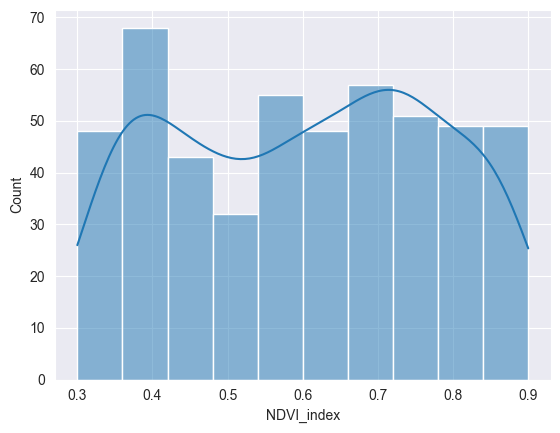

In [83]:
sns.histplot(x='NDVI_index',kde=True,  data=farm)

<Axes: xlabel='Kurtosis', ylabel='Count'>

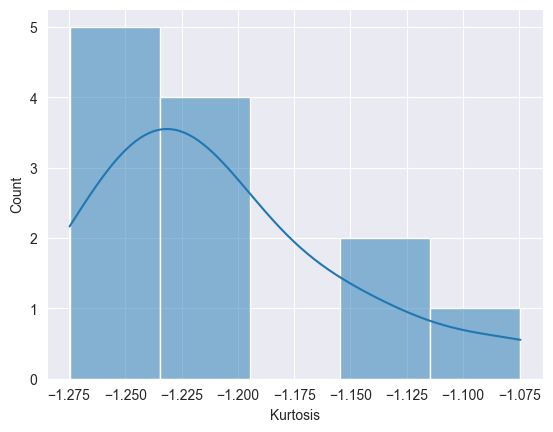

In [98]:
sns.histplot(x='Kurtosis', kde=True, data=stats)

In [101]:
combined = pd.concat([stats_df, farm_n], ignore_index=True)


In [106]:
combined.columns

Index(['Kurtosis', 'Skewness', 'soil_moisture_%', 'soil_pH', 'temperature_C',
       'rainfall_mm', 'humidity_%', 'sunlight_hours', 'pesticide_usage_ml',
       'total_days', 'yield_kg_per_hectare', 'latitude', 'longitude',
       'NDVI_index'],
      dtype='object')

<Axes: xlabel='Skewness', ylabel='Count'>

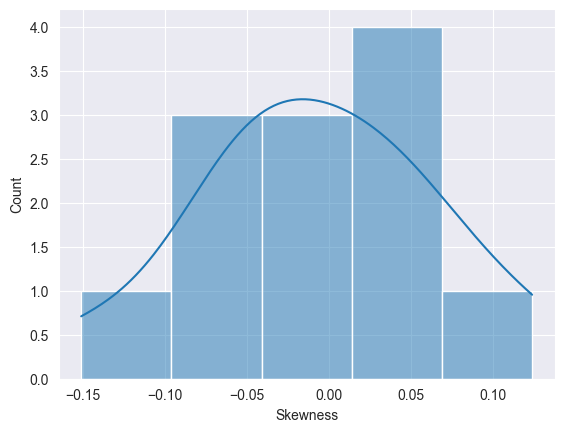

In [105]:
sns.histplot(x='Skewness', kde=True, data=stats)

In [110]:
corr_matrix_stats = stats_df.corr()
corr_matrix_stats.style.background_gradient()

,Kurtosis,Skewness
Kurtosis,1.000000,0.238324
Skewness,0.238324,1.000000


In [111]:
corr_matrix_farm_n = farm_n.corr()
corr_matrix_farm_n.style.background_gradient()

,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,pesticide_usage_ml,total_days,yield_kg_per_hectare,latitude,longitude,NDVI_index
soil_moisture_%,1.000000,0.001696,0.032365,0.048468,0.003722,0.058180,0.022374,0.006927,-0.063038,-0.013356,0.018570,-0.015675
soil_pH,0.001696,1.000000,0.031248,-0.059785,0.003853,-0.022967,-0.192798,0.018942,0.024274,-0.043649,-0.016157,0.092729
temperature_C,0.032365,0.031248,1.000000,0.026232,-0.028917,0.001237,0.019528,0.045627,0.027875,0.050449,0.039741,-0.032986
rainfall_mm,0.048468,-0.059785,0.026232,1.000000,-0.023946,0.005975,0.013479,-0.025672,-0.076802,0.068599,-0.004107,0.091088
humidity_%,0.003722,0.003853,-0.028917,-0.023946,1.000000,0.015724,0.029472,-0.017590,0.039021,-0.021625,0.013954,-0.027281
sunlight_hours,0.058180,-0.022967,0.001237,0.005975,0.015724,1.000000,0.002825,-0.006084,0.020284,-0.026100,-0.010468,0.004330
pesticide_usage_ml,0.022374,-0.192798,0.019528,0.013479,0.029472,0.002825,1.000000,0.040234,0.041290,-0.141935,0.047463,0.015329
total_days,0.006927,0.018942,0.045627,-0.025672,-0.017590,-0.006084,0.040234,1.000000,-0.007570,0.042761,-0.006205,-0.067138
yield_kg_per_hectare,-0.063038,0.024274,0.027875,-0.076802,0.039021,0.020284,0.041290,-0.007570,1.000000,-0.038127,0.022359,0.038099
latitude,-0.013356,-0.043649,0.050449,0.068599,-0.021625,-0.026100,-0.141935,0.042761,-0.038127,1.000000,-0.025941,-0.036218


In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [119]:
x = farm_n.drop('yield_kg_per_hectare', axis=1)
y = farm_n['yield_kg_per_hectare']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Linear = LinearRegression()
Linear.fit(x_train, y_train)
y_pred = Linear.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(r2, mse)


-0.051593674329895034 1452315.350058574


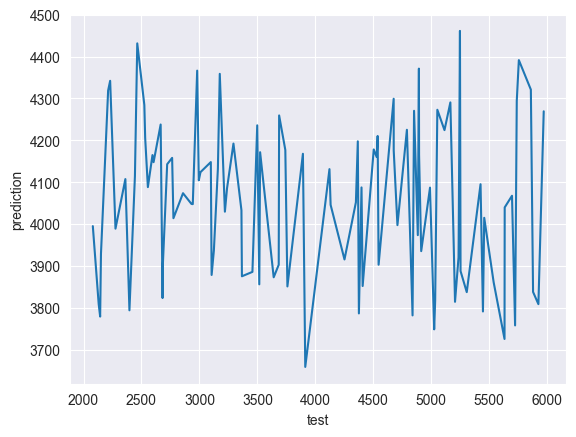

In [121]:
sns.lineplot(x=y_test, y=y_pred)
plt.xlabel('test')
plt.ylabel('prediction')
plt.show()

